<a href="https://colab.research.google.com/github/bansalshaleen/POS-tagging/blob/main/finding_tag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from bs4 import BeautifulSoup 
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:

#file = r'/gdrive/My Drive/3-1/csn-371/assignment 1/Assignment-files/Train-corups/A1/A1A.xml'
with open('/gdrive/My Drive/3-1/csn-371/assignment 1/Assignment-files/Train-corups/A1/A1A.xml', 'r') as f:
  data = f.read() 
Bs_data = BeautifulSoup(data, "xml")
#print(Bs_data) 
#b_unique = Bs_data.find_all('unique') 
  
#print(b_unique) 



In [ ]:
from xml.dom.minidom import parse

yXML = parse('/gdrive/My Drive/3-1/csn-371/assignment 1/Assignment-files/Train-corups/A1/A1A.xml')

print (' ')
print ('n       |       C5       |       hw       |       pos')

for bncDoc in yXML.getElementsByTagName('bncDoc'):
  #print(1)
  for wtext in bncDoc.getElementsByTagName('wtext'):
    #print(1)
    for p in wtext.getElementsByTagName('p'):
      #print(1)
      for s in p.getElementsByTagName('s'):
        #print(1)
        #for c in s.getElementsByTagName('c'):
          #print(2)
        for w in s.getElementsByTagName('w'):
          #print(1)
          print(s.getAttribute('n'), ' | ', w.getAttribute('c5'),' | ', w.getAttribute('hw'), ' | ', w.getAttribute('pos'))

In [ ]:
from bs4 import BeautifulSoup 
import os

# Reading the data inside the xml 
# file to a variable under the name  
# data 

#with open('TRY/AN0.xml', 'r') as f: 
  
  
# Passing the stored data inside 
# the beautifulsoup parser, storing 
# the returned object  

basepath =  "/gdrive/My Drive/3-1/csn-371/assignment 1/Assignment-files/Train-corups/"
d={}
d1={}
D={}
D_assign={}
for foldername in os.listdir(basepath):
  # print 'abc'
  tmp=os.path.join(basepath,foldername)
  for filename in os.listdir(tmp):
    #print 'xyz'
    f=open(os.path.join(tmp,filename),'r')
    data = f.read() 
    Bs_data = BeautifulSoup(data, "xml") 
    
    # Finding all instances of tag w 
    # Printing the word along with its POS tag 
    
    for posi in Bs_data.find_all('w'):
      #print(posi.text+'|'+posi.get('pos'))
      word=posi.text.lower()
      word=word.strip()
      tag=posi.get('c5')
      
      if word in D:
        if tag in D[word]:
          D[word][tag]=D[word][tag]+1
        else:
          D[word][tag]=1
          
      else:
        D[word]={}
        D[word][tag]=1
  
for x in D:
  Keymax = max(D[x], key=D[x].get)    
  D_assign[x]=Keymax
 


In [28]:
from bs4 import BeautifulSoup 
import os

# Reading the data inside the xml 
# file to a variable under the name  
# data 

#with open('TRY/AN0.xml', 'r') as f: 
  
  
# Passing the stored data inside 
# the beautifulsoup parser, storing 
# the returned object  

basepath =  "/gdrive/My Drive/3-1/csn-371/assignment 1/Assignment-files/Train-corups/"
d={}
d1={}
D={}
'''
for foldername in os.listdir(basepath):
   # print 'abc'
    tmp=os.path.join(basepath,foldername)
    for filename in os.listdir(tmp):
      #  print 'xyz'
        f=open(os.path.join(tmp,filename),'r')
        data = f.read() 
        Bs_data = BeautifulSoup(data, "xml") 
       
        # Finding all instances of tag w 
        # Printing the word along with its POS tag 
        
        for posi in Bs_data.find_all('w'):
           #print(posi.text+'|'+posi.get('pos'))
           word=posi.text.lower()
           tag=posi.get('c5')
           
           if word in D:
               if tag in D[word]:
                  D[word][tag]=D[word][tag]+1
               else:
                  D[word][tag]=1 
           else:
              D[word][tag]=1
              
           print(D[word])
'''

#f=open("/gdrive/My Drive/3-1/csn-371/assignment 1/Assignment-files/Train-corups/",'r')

   
# Finding all instances of tag w 
# Printing the word along with its POS tag 

for foldername in os.listdir(basepath):
   # print 'abc'
    tmp=os.path.join(basepath,foldername)
    for filename in os.listdir(tmp):
      #  print 'xyz'
      f=open(os.path.join(tmp,filename),'r')
      data = f.read() 
      Bs_data = BeautifulSoup(data, "xml") 
      
      # Finding all instances of tag w 
      # Printing the word along with its POS tag 
      prevtag="NN1"
      for posi in Bs_data.find_all('w'):
        #print(posi.text+'|'+posi.get('pos'))
        word=posi.text.lower()
        word=word.strip()
        tag=posi.get('c5')
        
        if word in D:
            if prevtag in D[word]:
              if tag in D[word][prevtag]:
                D[word][prevtag][tag]=D[word][prevtag][tag]+1
              else:
                D[word][prevtag][tag]=1
            else:
              D[word][prevtag]={}
              D[word][prevtag][tag]=1
            
        else:
          D[word]={}
          D[word][prevtag]={}
          D[word][prevtag][tag]=1
        prevtag=tag
  

D_asssign={}
for x in D:
  D_asssign[x]={} 
  for y in D[x]:
    Keymax = max(D[x][y], key=D[x][y].get)
    D_asssign[x][y]=Keymax
 
count_right=0
count_wrong=0      
y_true=[]
y_pred=[]
label=[]
basepath =  "/gdrive/My Drive/3-1/csn-371/assignment 1/Assignment-files/Test-corpus/"
for foldername in os.listdir(basepath):
   # print 'abc'
  tmp=os.path.join(basepath,foldername)
  for filename in os.listdir(tmp):
    #  print 'xyz'
    f=open(os.path.join(tmp,filename),'r')
    data = f.read() 
    Bs_data = BeautifulSoup(data, "xml") 
    
    # Finding all instances of tag w 
    # Printing the word along with its POS tag 
    pretag="NN1"
    for posi in Bs_data.find_all('w'):
      #print(posi.text+'|'+posi.get('pos'))
      word=posi.text.lower()
      word=word.strip()
      tag=posi.get('c5')
      y_true.append(tag)
      if tag in label:
        pass
      else:
        label.append(tag)
      if word in D_asssign:
        if pretag in D_asssign[word]:
          if D_asssign[word][pretag]==tag:
            count_right=count_right+1
          else:
            count_wrong=count_wrong+1
          y_pred.append(D_asssign[word][pretag])
        else:
          if tag==D_assign[word]:
            count_right=count_right+1
          else:
            count_wrong=count_wrong+1
          y_pred.append(D_assign[word])
      else:
        if tag=="NN1":
          count_right=count_right+1
        else:
          count_wrong=count_wrong+1
        y_pred.append("NN1")

      pretag=tag

print(count_right)
print(count_wrong)



3316044
313981


In [23]:
import numpy as np
np.set_printoptions(threshold=np.inf)

confusion_matrix(y_pred,y_true)

array([[229464,   1783,   3845,    283,    467,    511,      0,      0,
             0,   1428,    714,      1,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      2,      0,      0,
           110,      0,      0,      0,     98,      5,   4187,   2374,
            22,     37,      6,     14,      0,   1629,     41,      0,
             0,      0,      0,      0,      0,      0,      0,     73,
             4,      0,      0,     26,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      1,      0,
             0,      0,      0,      0,      0,      0,      5,    511,
            34,    486,    136,    132,    423,    375,     13,    199,
          1009,    458,    185,      0,      0,      0,      1],
       [   284,    473,      5,      0,      0,      0,      0,      0,
             0,     31,     78,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,

(87, 87)


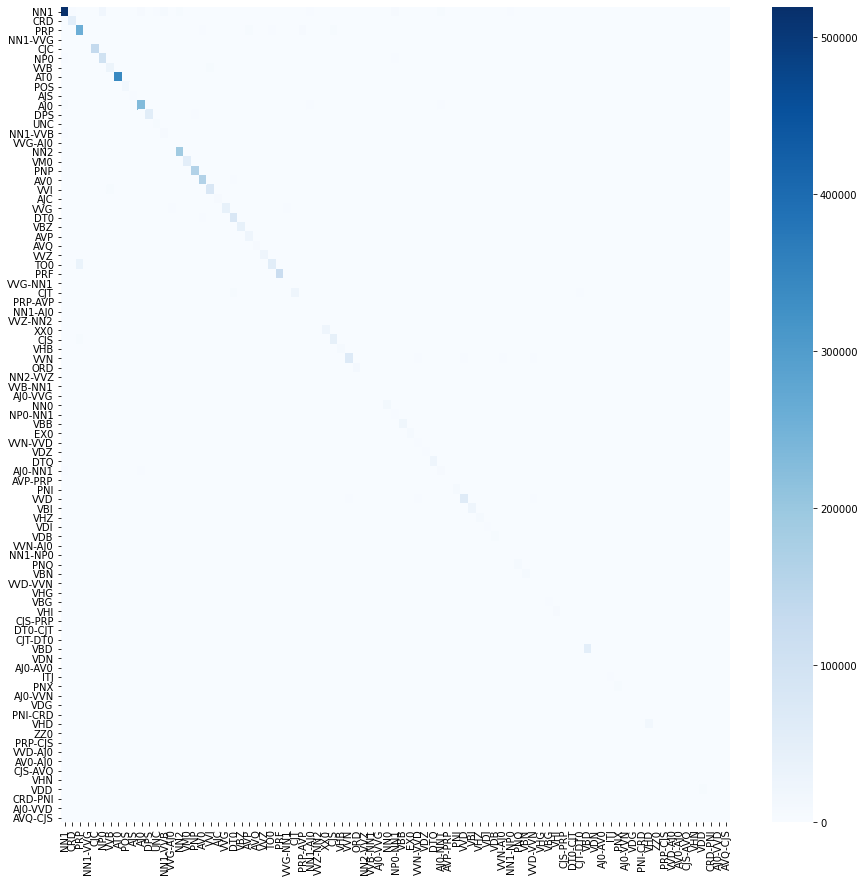

In [32]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,15))
fig.set_facecolor('white')
mat=confusion_matrix(y_pred,y_true, label)
sum=mat.sum()
print(mat.shape)

#print (mat.shape)
sns.heatmap(mat,ax=ax, yticklabels=label, cmap='Blues', xticklabels=label)
#plt.show()